In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

In [2]:
from domino.data_sources import DataSourceClient

# instantiate a client and fetch the datasource instance
ds = DataSourceClient().get_datasource("UX-QUALITY")

# res is a simple wrapper of the query result
res = ds.query("select * from RAW_OIL_PRICE")

# to_pandas() loads the result into a pandas dataframe
df = res.to_pandas()
df.head(10)

,DATE,EXON_PRICE,OIL_PRICE
0,2014-03-28,97.699997,106.64
1,2014-03-31,97.680000,105.95
2,2014-04-01,97.730003,105.70
3,2014-04-02,97.949997,103.37
4,2014-04-03,97.930000,104.88
5,2014-04-04,97.360001,106.41
6,2014-04-07,96.779999,104.89
7,2014-04-08,97.449997,105.83
8,2014-04-09,97.330002,107.39
9,2014-04-10,96.779999,107.10


In [3]:
# set the index equal to the date column & then drop the old date column
df.index = pd.to_datetime(df['DATE'])
df = df.drop(['DATE'], axis = 1)

# Correcting typo in one of the column names
new_column_names = {'EXON_PRICE':'EXXON_PRICE'}

# rename the column
df = df.rename(columns = new_column_names)
df.head()

,EXXON_PRICE,OIL_PRICE
DATE,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [4]:
# check for missing values
display(df.isna().any())

EXXON_PRICE    False
OIL_PRICE      False
dtype: bool

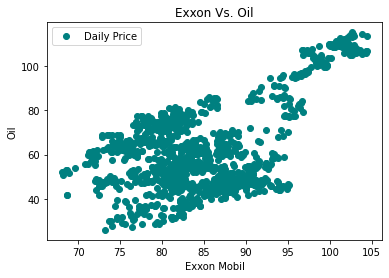

In [5]:
# define the x & y data.
x = df['EXXON_PRICE']
y = df['OIL_PRICE']

# create the scatter plot.
plt.plot(x, y, 'o', color ='teal', label = 'Daily Price')

# make sure it's formatted.
plt.title("Exxon Vs. Oil")
plt.xlabel("Exxon Mobil")
plt.ylabel("Oil")
plt.legend()

plt.show()

In [6]:
# let's measure that correlation
df.corr()

,EXXON_PRICE,OIL_PRICE
EXXON_PRICE,1.00000,0.60132
OIL_PRICE,0.60132,1.00000


In [7]:
# let's take a look at a statistical summary.
df.describe()

,EXXON_PRICE,OIL_PRICE
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


array([[<AxesSubplot:title={'center':'EXXON_PRICE'}>,
        <AxesSubplot:title={'center':'OIL_PRICE'}>]], dtype=object)

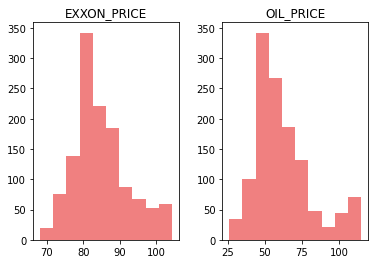

In [8]:
df.hist(grid = False, color = 'lightcoral')

In [9]:
# define our input variable (X) & output variable.
Y = df.drop('OIL_PRICE', axis = 1)
X = df[['OIL_PRICE']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [15]:
# create a Linear Regression model object.
regression_model = LinearRegression()

# pass through the X_train & y_train data set.
regression_model.fit(X_train.values, y_train.values)

# let's test a prediction
prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0][0]
print("The predicted value of Exxon stock price is {:.4}".format(predicted_value))

The predicted value of Exxon stock price is 85.95


In [16]:
# Let's grab the coefficient of our model and the intercept.
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))

The Coefficient for our model is 0.24
The intercept for our model is 70.01


InvalidIndexError: (slice(None, None, None), None)

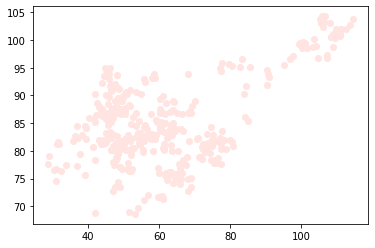

In [17]:
# Plot outputs
plt.scatter(X_test, y_test,  color='mistyrose', label = 'Price')
plt.plot(X_test, y_predict, color='cornflowerblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Linear Regression Exxon Mobil Vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Exxon Mobil")
plt.legend()
plt.show()

# The coefficients
print('Oil coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(regression_model.coef_[0][0]))

In [18]:
import pickle

# pickle the model.
with open('/mnt/artifacts/my_linear_regression.sav','wb') as f:
     pickle.dump(regression_model,f)